# Week 11:  Data Exploration and Visualization

## Exploratory Data Analysis (EDA)

###1. Import the data
###2. Explore the dataset
###3. Identify data quality issues
###4. data pre-processing
###5. data visualization


## Let the Coding Begin!


In [68]:
import pandas as pd
import numpy as np

**Mount your googledrive to access files**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Reading data from CSV file

#### About the dataset:
This dataset is about the US Permanent Visa Application decisions. The original data covers years 2012 - 2017 and includes information on employer, position, wage offered, job posting history, employee education and past visa history, associated lawyers, and final decision. It was collected and distributed by the US Department of Labor. The dataset we will be using is a small subset of the original dataset.

**Context:** A permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. In most instances, before the U.S. employer can submit an immigration petition to the Department of Homeland Security's U.S. Citizenship and Immigration Services (USCIS), the employer must obtain a certified labor certification application from the DOL's Employment and Training Administration (ETA). The DOL must certify to the USCIS that there are not sufficient U.S. workers able, willing, qualified and available to accept the job opportunity in the area of intended employment and that employment of the foreign worker will not adversely affect the wages and working conditions of similarly employed U.S. workers.

The goal of the below data analysis is checking the general trend in Visa applications, the most popular citizenships, employers, cities and finally, predicting the application decision based on the chosen features, etc.

The current dataset used in this notebook contains 2000 rows.

***Reference:*** https://www.kaggle.com/elzawie/us-permanent-visa-applications-v1-1

**Question: Read data using Pandas dataframe**

In [80]:
df = pd.read_csv("/content/drive/MyDrive/430031 notebooks/Week 11/Data/visa_processed.csv") # Reading the file and storing the data inside the variable df
df.head()

,row ID,agent_city,agent_firm_name,agent_state,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,...,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,year,decision_year,decision_month
0,133236,houston,foster llp,tx,A-15034-47732,2015-02-20,Certified,H-1B,CHINA,2015-09-08,...,77032,texas,1984.0,Y,CHINA,KATY,Doctorate,2015.0,2015,9
1,30115,woodland hills,trustworthy visa,ca,A-15065-56624,2015-03-10,Certified-Expired,NaN,IRAN,2015-10-09,...,77086,tx,2008.0,NaN,NaN,SHIRAZ,Master's,2015.0,2015,10
2,259290,boston,"fragomen, del rey, bernsen & loewy, llp",ma,A-16166-21556,2016-07-01,Certified,H-1B,CHINA,2016-09-30,...,94089,ca,1957.0,NaN,NaN,SAN JOSE,Master's,2016.0,2016,9
3,196329,chicago,"fragomen, del rey, bernsen & loewy llp",il,A-16117-01841,2016-07-12,Certified,H-1B,INDIA,2016-09-22,...,60601,il,2000.0,NaN,NaN,HARTFORD,Master's,2016.0,2016,9
4,34932,NaN,NaN,NaN,A-15083-61379,2015-03-25,Withdrawn,H-1B,SOUTH KOREA,2015-03-25,...,11050,new york,1991.0,A,SOUTH KOREA,HICKSVILLE,Bachelor's,2015.0,2015,3


### 2 Initial Data Exploration



**Question:** <br/> 1. Find the total number for visa application present in the dataset.
<br/> 2. Find the total number of attributes in the dataset.

In [76]:
### Start the code here (~ 3 lines of code)
print(df.shape)

(2000, 29)


**Question:** <br/> 3. What are the names of different attributes?

In [77]:
# Display the names of different attributes
print(df.columns.values)

['row ID' 'agent_city' 'agent_firm_name' 'agent_state' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'decision_date' 'employer_address_1'
 'employer_address_2' 'employer_city' 'employer_country'
 'employer_decl_info_title' 'employer_name' 'employer_num_employees'
 'employer_phone' 'employer_phone_ext' 'employer_postal_code'
 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'year' 'decision_year' 'decision_month']


**Checking for the null data and the data_types of the rows**

**Type**<br>print(df.isnull().any()) and <br> print(df.dtypes)

**Question** <br/> 4. Are there any Null values in the dataset and corresponding to each attribute?
<br/> 5. What is the datatypes of each attribute?

In [81]:
### Start your code here (~ 2 line of code)
print("Checking for Null values in data:")
print(df.isnull().sum())

print("\n\nData type of each attributes:")
print(df.dtypes, end = " ")
### End of the code here

Checking for Null values in data:
row ID                                       0
agent_city                                 191
agent_firm_name                            230
agent_state                                224
case_number                                  0
case_received_date                           0
case_status                                  0
class_of_admission                          79
country_of_citizenship                       0
decision_date                                0
employer_address_1                           0
employer_address_2                        1291
employer_city                                0
employer_country                             0
employer_decl_info_title                     0
employer_name                                0
employer_num_employees                       0
employer_phone                               0
employer_phone_ext                        1787
employer_postal_code                         0
employer_state            

**What will be the decisions based on these results?**


*   Remove columns which has large number of missing values and impute the ones with few
*   Fix attrbiute type



In [82]:
#Remove all unwanted columns using drop function
df.drop(columns=['row ID','employer_address_2', 'employer_phone_ext', 'foreign_worker_info_alt_edu_experience', 'foreign_worker_info_birth_country','year','decision_year','decision_month','employer_phone'], inplace=True)
print(df.isnull().sum())

agent_city                       191
agent_firm_name                  230
agent_state                      224
case_number                        0
case_received_date                 0
case_status                        0
class_of_admission                79
country_of_citizenship             0
decision_date                      0
employer_address_1                 0
employer_city                      0
employer_country                   0
employer_decl_info_title           0
employer_name                      0
employer_num_employees             0
employer_postal_code               0
employer_state                     0
employer_yr_estab                  1
foreign_worker_info_city           0
foreign_worker_info_education      0
dtype: int64


In [86]:
#Fix attribute types
df['case_received_date']=pd.to_datetime(df['case_received_date'], format = '%Y-%m-%d')
df['decision_date']=pd.to_datetime(df['decision_date'], format = '%Y-%m-%d')
df['employer_yr_estab'] = df['employer_yr_estab'].astype(object)
print(df.dtypes)

agent_city                               object
agent_firm_name                          object
agent_state                              object
case_number                              object
case_received_date               datetime64[ns]
case_status                              object
class_of_admission                       object
country_of_citizenship                   object
decision_date                    datetime64[ns]
employer_address_1                       object
employer_city                            object
employer_country                         object
employer_decl_info_title                 object
employer_name                            object
employer_num_employees                    int64
employer_postal_code                     object
employer_state                           object
employer_yr_estab                        object
foreign_worker_info_city                 object
foreign_worker_info_education            object
dtype: object


In [87]:
#Impute the missing values based on their attrbiute
# Iterate over columns
for col in df.columns:
    if df[col].dtype == 'object':
        mode_val = df[col].mode()[0]  # Calculate mode
        df[col].fillna(mode_val, inplace=True)  # Impute missing values with mode
    else:
        mean_val = df[col].mean()  # Calculate mean
        df[col].fillna(mean_val, inplace=True)  # Impute missing values with mean

print(df.isnull().sum())

agent_city                       0
agent_firm_name                  0
agent_state                      0
case_number                      0
case_received_date               0
case_status                      0
class_of_admission               0
country_of_citizenship           0
decision_date                    0
employer_address_1               0
employer_city                    0
employer_country                 0
employer_decl_info_title         0
employer_name                    0
employer_num_employees           0
employer_postal_code             0
employer_state                   0
employer_yr_estab                0
foreign_worker_info_city         0
foreign_worker_info_education    0
dtype: int64


## 3 Data visualisation

In [88]:
# Import the MatPlotLib and the Seaborn library
import matplotlib.pyplot as plt
import seaborn as sns # Importing Seaborn library

**Check of the numeric attrbiutes have outliers using BoxPlot**

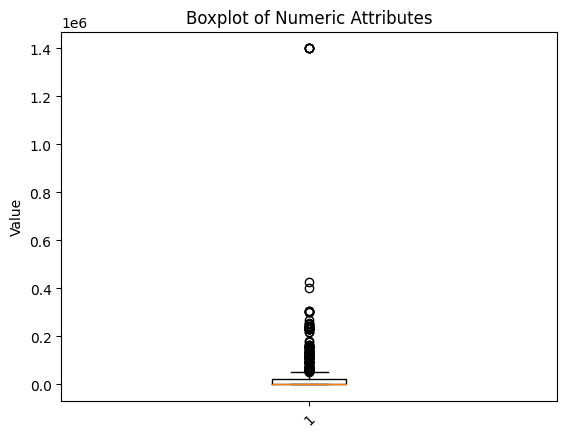

In [90]:
plt.boxplot(df['employer_num_employees'])
plt.title('Boxplot of Numeric Attributes')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [91]:
#Treatment 1
#Question: Remove all the rows with outliers
# Function to remove outliers from all numeric attributes
print(df.shape)
def remove_outliers(df):
    cleaned_df = df.copy()
    for col in cleaned_df.select_dtypes(include=["number"]).columns:
        Q1 = np.percentile(cleaned_df[col], 25)
        Q3 = np.percentile(cleaned_df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers from DataFrame
df_cleaned = remove_outliers(df)
print(df_cleaned.shape)

(2000, 20)
(1560, 20)


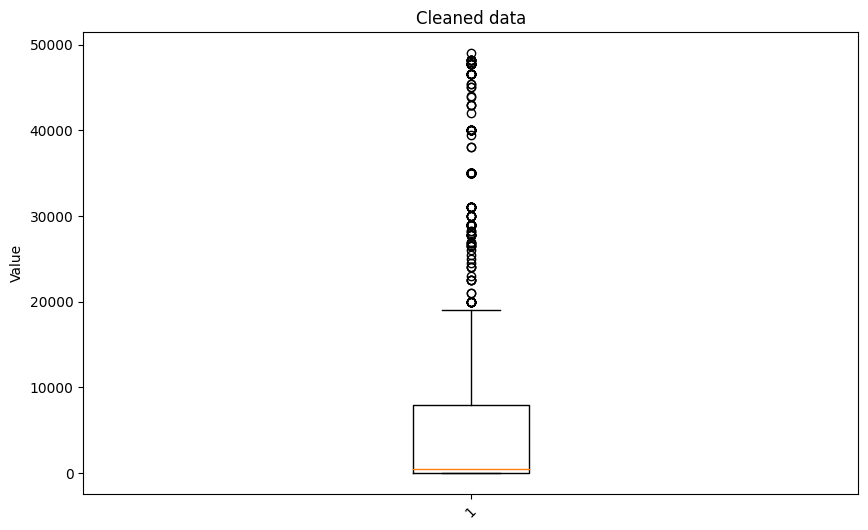

In [92]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['employer_num_employees'])
plt.title('Cleaned data')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [93]:
#Treatment 2
#Question: Replace outliers by missing value
print(df.shape)
def remove_outliers(df):
    cleaned_df = df.copy()
    for col in cleaned_df.select_dtypes(include=["number"]).columns:
        Q1 = np.percentile(cleaned_df[col], 25)
        Q3 = np.percentile(cleaned_df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df.loc[(cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound), col] = np.nan
    return cleaned_df

# Remove outliers from DataFrame
df_cleaned1 = remove_outliers(df)
print(df_cleaned1.shape)

(2000, 20)
(2000, 20)


### 4 Manipulating/Processing data

**Question**:
<br/> How many days does it took to process each visa application?

**Hint:** Find the difference between the case recieved date and decision day

There are two columns having the records in the form of date "decision_date" and "case_received_date".

In [94]:
from datetime import datetime
data_rcvd = pd.to_datetime(df_cleaned['case_received_date'], format = '%Y-%m-%d')
date_decided = pd.to_datetime(df_cleaned['decision_date'], format = '%Y-%m-%d')
# Calculate the difference between the two dates
date_difference = date_decided - data_rcvd
# Extract the number of days and seconds from the difference
df_cleaned['decision_total_days']=date_difference

New attributes are now added to the dataframe. Let's check the dataframe and the attribute count

**Question**: Generate statistics of the dataset

In [97]:
df_cleaned.describe()

,case_received_date,decision_date,employer_num_employees,employer_yr_estab,decision_total_days
count,1560,1560,1560.000000,1560.000000,1560
mean,2015-05-27 15:41:32.307692288,2015-12-12 01:10:09.230769152,6954.832051,1996.600641,198 days 09:28:36.923076924
min,2008-11-14 00:00:00,2014-10-01 00:00:00,0.000000,1955.000000,0 days 00:00:00
25%,2014-10-20 18:00:00,2015-06-18 00:00:00,49.750000,1992.000000,109 days 00:00:00
50%,2015-06-11 00:00:00,2016-01-05 00:00:00,500.000000,1998.000000,159 days 00:00:00
75%,2016-02-11 00:00:00,2016-06-10 00:00:00,8000.000000,2006.000000,203 days 00:00:00
max,2016-11-23 00:00:00,2016-12-29 00:00:00,49000.000000,2016.000000,2391 days 00:00:00
std,NaN,NaN,12343.380667,12.147432,176 days 10:06:53.527480930




**Question:** <br/> What is the average processing time for visa application?
<br/> What is the maximum number of days for processing a visa application?

In [99]:
### Start the code here (~ 2 lines of code)
mean = np.mean(df_cleaned['decision_total_days'])
maximum = np.max(df_cleaned['decision_total_days'])
### End of the code here

print ("Average visa processing time: "+ str(mean)+ " days")
print("Maximum days taken by a Visa application: ", str(maximum)+ " days")

Average visa processing time: 198 days 09:28:36.923076924 days
Maximum days taken by a Visa application:  2391 days 00:00:00 days


### 4. More on Initial Data Exploration with Visualization

In [100]:
# Import the seaborn library as sns and matplotlib.pylot library as plt
### Start the code here (~ 2 lines of code)
import seaborn as sns
import matplotlib.pyplot as plt


**Question**: using bar chart, show the freq of applications per state

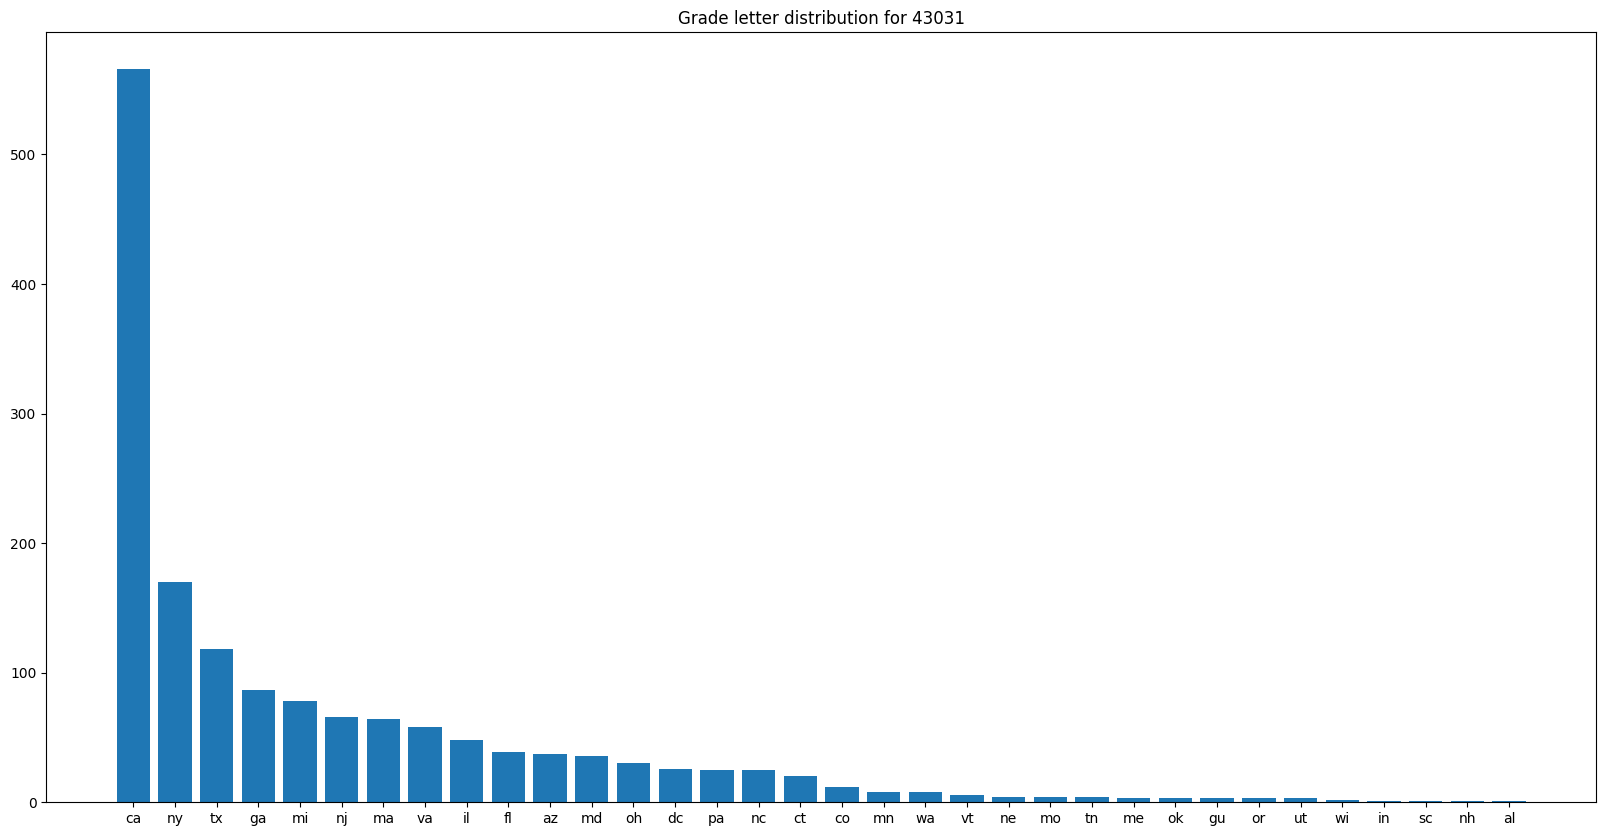

In [101]:
values=df_cleaned['agent_state'].value_counts()
# Create pie chart
plt.figure(figsize=(20, 10))
#plt.pie(values, labels=values.index,autopct='%1.1f%%')
plt.bar(values.index,values)
plt.title('Grade letter distribution for 43031')
plt.show()

**Question**: show the boxplot of the total decision plot?

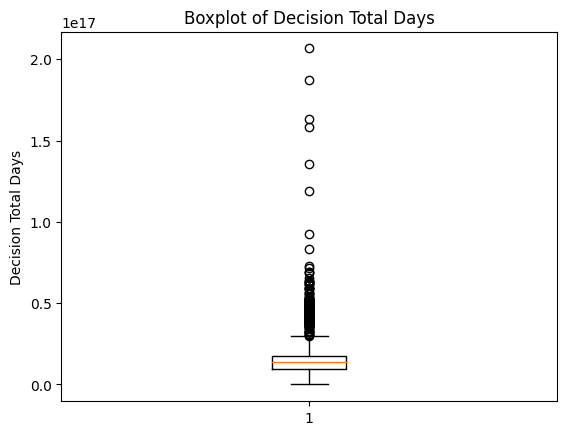

In [102]:
plt.boxplot(df_cleaned['decision_total_days'])
plt.xlabel('')
plt.ylabel('Decision Total Days')
plt.title('Boxplot of Decision Total Days')
plt.show()

Question: show the histogram of the employer_num_employees?

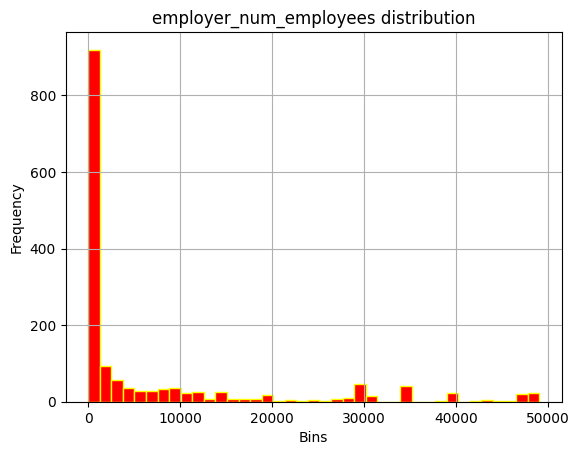

In [107]:
#estimate number of bin by square root of total number of rows
nb_bins=round(df_cleaned.shape[0]**0.5)
plt.hist(df_cleaned['employer_num_employees'], bins=nb_bins, color='red', edgecolor='yellow')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('employer_num_employees distribution')
plt.grid(True)
plt.show()




**Question:** Create a pie chart of the case_status with appropriate title,, Y label, and X label.

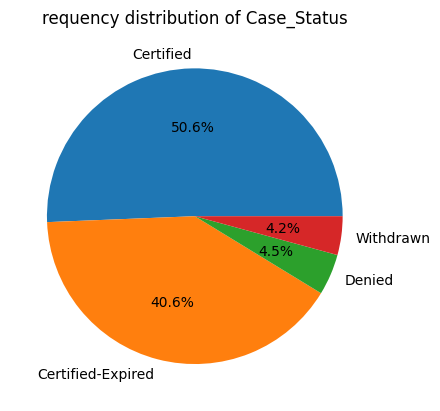

In [104]:
values=df_cleaned['case_status'].value_counts()
plt.pie(values, labels=values.index,autopct='%1.1f%%')
plt.title('requency distribution of Case_Status')
plt.show()



**Question:** Check if there is any relationship between employer number and days to decision.

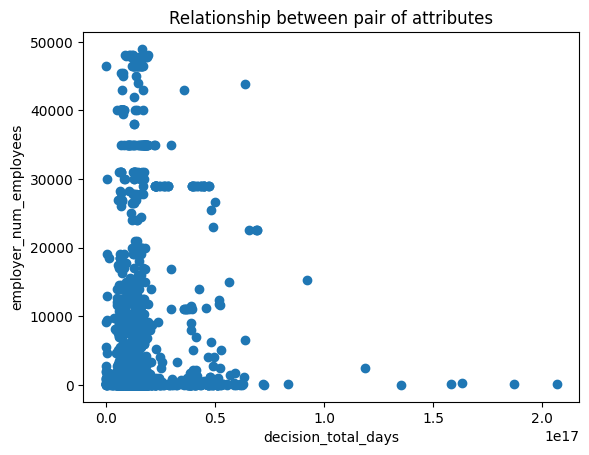

In [109]:
plt.scatter(df_cleaned['decision_total_days'], df_cleaned['employer_num_employees'])
# Add labels and title
plt.xlabel('decision_total_days')
plt.ylabel('employer_num_employees')
plt.title('Relationship between pair of attributes')
plt.show()
